In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Importing the Dataset
df = pd.read_csv(r"Coffee_sales.csv")

In [2]:
#list of first five rows
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:

#list of last five rows
df.tail()

,date,datetime,cash_type,card,money,coffee_name
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano
3635,2025-03-23,2025-03-23 18:11:38.635,card,ANON-0000-0000-1275,35.76,Latte


In [4]:
#shape
df.shape

(3636, 6)

In [5]:
# Data Info
#Basic information about data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [6]:
# Convert date/datetime columns
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [7]:
# Fill missing 'card' with 'Unknown'
df['card'] = df['card'].fillna('Unknown')

In [8]:
#Top-selling coffee types
top_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
print("\nTop 5 Coffee Sales:")
print(top_coffee.head())


Top 5 Coffee Sales:
coffee_name
Latte                  27866.30
Americano with Milk    25269.12
Cappuccino             18034.14
Americano              15062.26
Hot Chocolate          10172.46
Name: money, dtype: float64


In [9]:
# Daily revenue
daily_sales = df.groupby('date')['money'].sum()

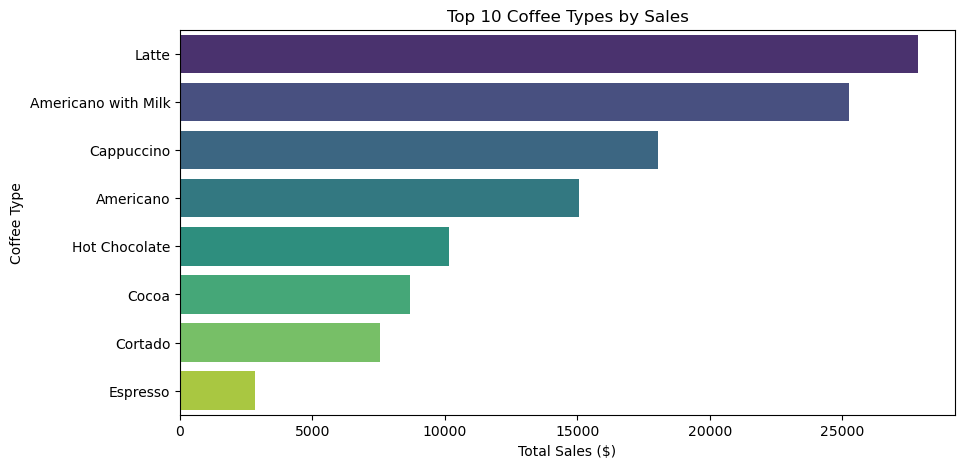

In [10]:
# Top 10 coffee types bar chart
plt.figure(figsize=(10,5))
sns.barplot(
    x=top_coffee.head(10).values, 
    y=top_coffee.head(10).index, 
    hue=top_coffee.head(10).index,
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Top 10 Coffee Types by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Coffee Type")
plt.show()

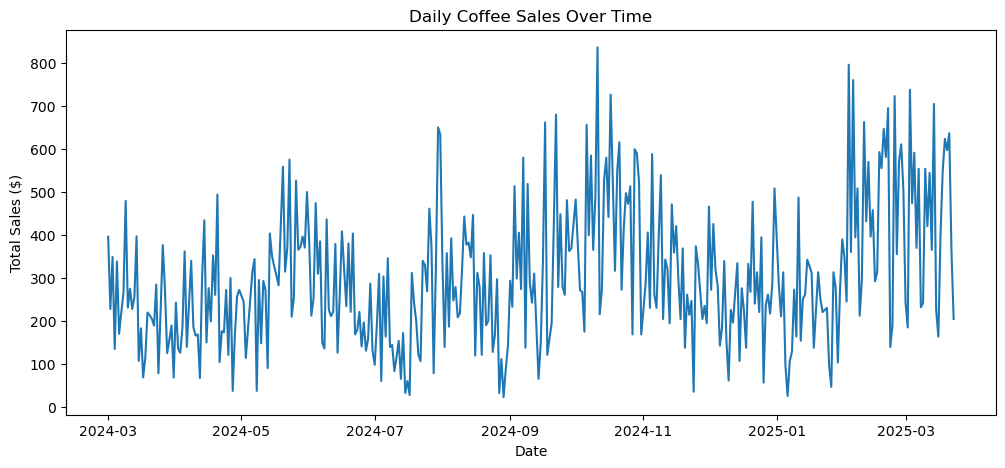

In [11]:
# Daily sales line chart
plt.figure(figsize=(12,5))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title("Daily Coffee Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.show()

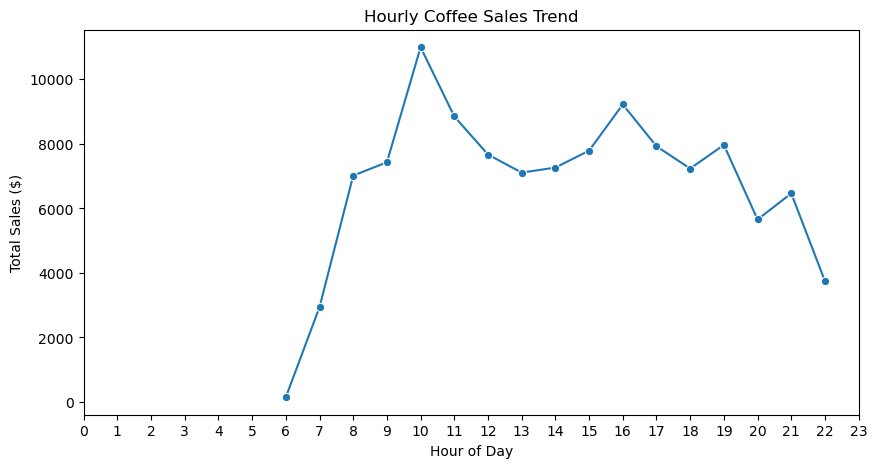

In [12]:
#Hourly sales trend
df['hour'] = df['datetime'].dt.hour
hourly_sales = df.groupby('hour')['money'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title("Hourly Coffee Sales Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales ($)")
plt.xticks(range(0,24))
plt.show()

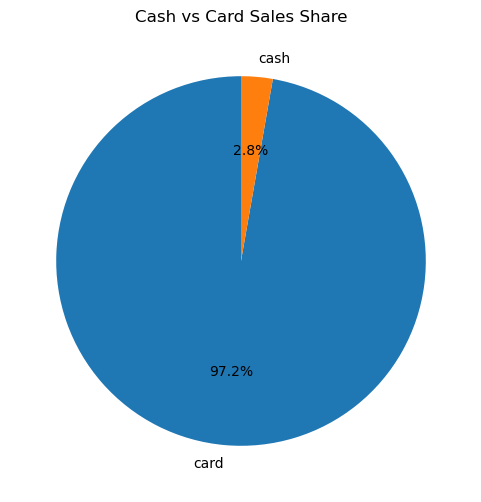

In [13]:
#Cash vs Card sales share
payment_sales = df.groupby('cash_type')['money'].sum()

plt.figure(figsize=(6,6))
plt.pie(payment_sales, labels=payment_sales.index, autopct='%1.1f%%', startangle=90)
plt.title("Cash vs Card Sales Share")
plt.show()

In [17]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create monthly sales summary
monthly_sales = df.groupby(df['date'].dt.month)['money'].sum()

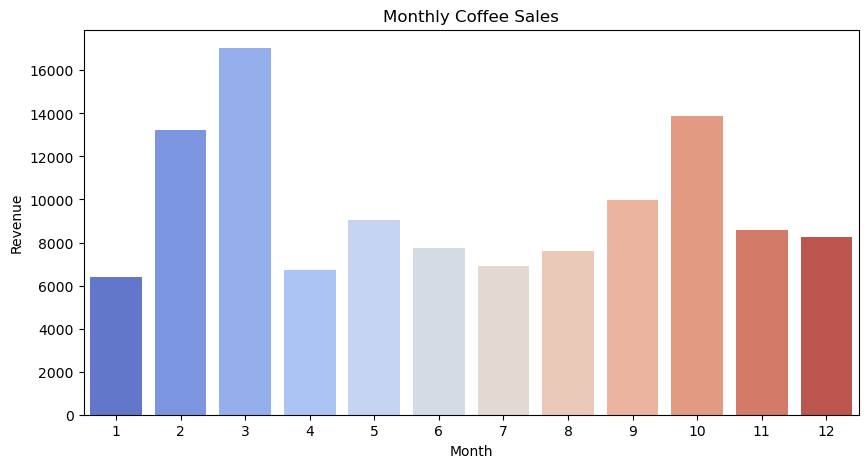

In [18]:
#Monthly revenue

plt.figure(figsize=(10,5))
sns.barplot(
    x=monthly_sales.index.astype(str),
    y=monthly_sales.values,
    hue=monthly_sales.index.astype(str),
    palette="coolwarm",
    dodge=False,
    legend=False
)
plt.title("Monthly Coffee Sales")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [ ]:
#Coffee Sales Insights
#Top sellers: Latte, Americano with Milk, and Cappuccino lead in revenue.
#Peak hour: 10 AM sees the highest sales volume.
#Busiest month: March records the most revenue.
#Payment trend: 97% of payments are via card, only 3% in cash.
#Revenue driver: Mid-morning coffee rush is the main sales boost.
#Customer preference: Milk-based coffees dominate over plain brews.